In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Reshaping to add channel dimension (28x28x1)
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 19s 20ms/step - loss: 0.1568 - accuracy: 0.9530 - val_loss: 0.0499 - val_accuracy: 0.9837
Epoch 2/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0482 - accuracy: 0.9850 - val_loss: 0.0371 - val_accuracy: 0.9876
Epoch 3/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0315 - val_accuracy: 0.9893
Epoch 4/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0249 - accuracy: 0.9926 - val_loss: 0.0319 - val_accuracy: 0.9895
Epoch 5/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0368 - val_accuracy: 0.9874
Epoch 6/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0297 - val_accuracy: 0.9902
Epoch 7/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0324 - val_accuracy:

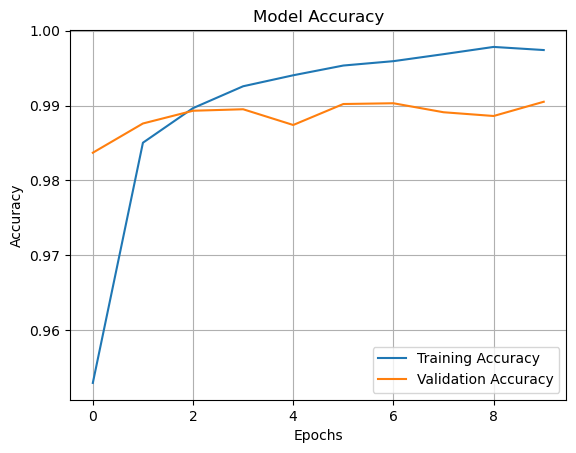

In [5]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_accuracy(history)

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'CNN Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0354 - accuracy: 0.9905
CNN Test accuracy: 0.9905
